# **Smoking Detection Project by Sarthak Pathak**  🧑🏻‍💻🖥️

### About Project 🗄️

##### This project is developed to fulfil the criteria to get an internship certificate as a part of Summer Training Program offered by E&ICT Academy, IIT Kanpur for a duration of 6 weeks.
##### The dataset and aim of project both are given by the instructor on the last day of internship program.
##### I am thankful to my instructor and IIT-Kanpur for enhancing me in the evolving field of today's technological domain.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("smoking.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [4]:
# removing ID because it is a index columns that won't help to identify the duplicates 
df.drop(columns="ID",inplace=True)

In [5]:
# total number of duplicated values 
df.duplicated().sum()

11140

In [6]:
# deleting the duplicates values 
df.drop_duplicates(inplace=True)

In [7]:
# total number of unique values in each columns
df.nunique()

gender                   2
age                     14
height(cm)              13
weight(kg)              22
waist(cm)              566
eyesight(left)          19
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               130
relaxation              95
fasting blood sugar    276
Cholesterol            286
triglyceride           390
HDL                    126
LDL                    289
hemoglobin             145
Urine protein            6
serum creatinine        38
AST                    219
ALT                    245
Gtp                    488
oral                     1
dental caries            2
tartar                   2
smoking                  2
dtype: int64

In [8]:
# median age of people who smoke and don't smoke 
df.groupby("smoking")["age"].median()

smoking
0    45.0
1    40.0
Name: age, dtype: float64

In [9]:
df["gender"].value_counts()

M    28349
F    16203
Name: gender, dtype: int64

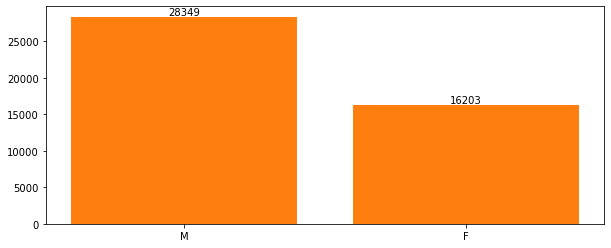

In [10]:
plt.figure(figsize=(10,4))
x = df["gender"].value_counts().index
y = df["gender"].value_counts().values
plt.bar(x,y)
plt.bar_label(plt.bar(x,y))
plt.show()

In [11]:
df.nunique().head(10)

gender               2
age                 14
height(cm)          13
weight(kg)          22
waist(cm)          566
eyesight(left)      19
eyesight(right)     17
hearing(left)        2
hearing(right)       2
systolic           130
dtype: int64

In [12]:
df["eyesight(right)"].value_counts()

1.2    10003
1.0     9988
1.5     6086
0.8     4324
0.9     4210
0.7     3479
0.6     1904
0.5     1726
0.4     1040
0.3      685
0.2      415
0.1      297
2.0      297
9.9       75
1.6       15
1.3        6
1.1        2
Name: eyesight(right), dtype: int64

In [13]:
df["eyesight(left)"].value_counts()

1.2    10166
1.0     9734
1.5     6240
0.8     4229
0.9     4140
0.7     3569
0.6     1990
0.5     1683
0.4      973
0.3      716
0.2      386
2.0      325
0.1      297
9.9       74
1.6       16
1.3        8
1.1        3
1.9        2
1.8        1
Name: eyesight(left), dtype: int64

In [14]:
df["hearing(right)"].value_counts()

1.0    43392
2.0     1160
Name: hearing(right), dtype: int64

In [15]:
df["hearing(left)"].value_counts()

1.0    43411
2.0     1141
Name: hearing(left), dtype: int64

In [16]:
# This the how we create all boxplot with a single code
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()    

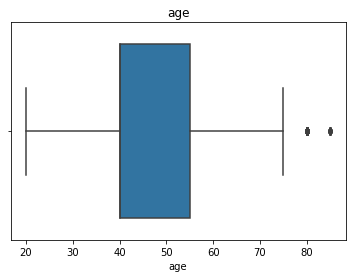

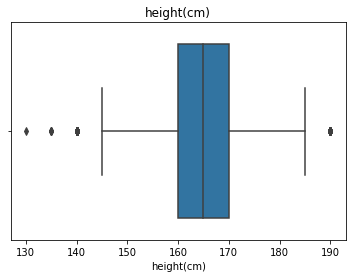

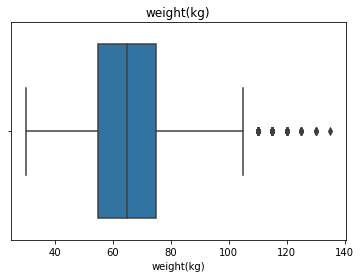

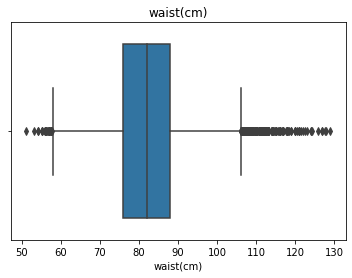

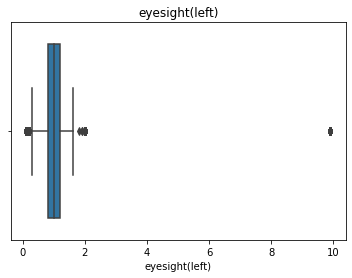

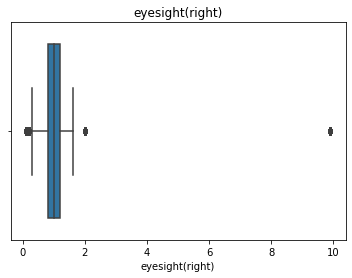

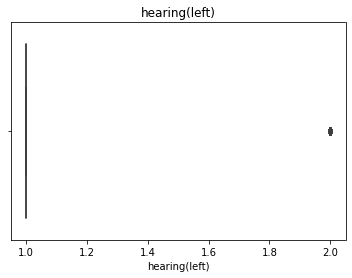

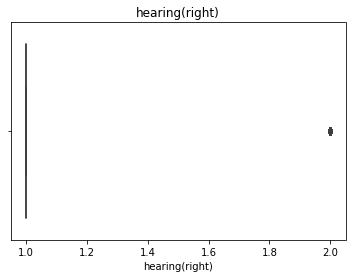

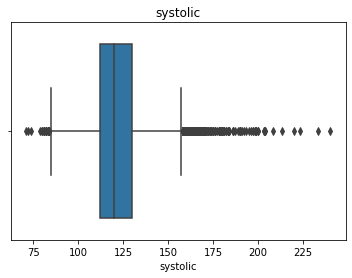

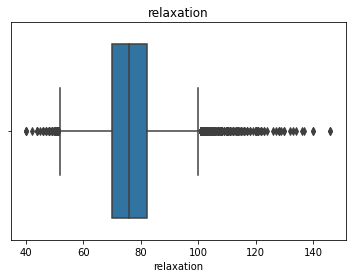

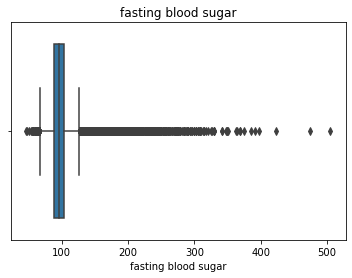

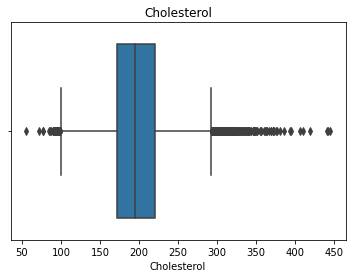

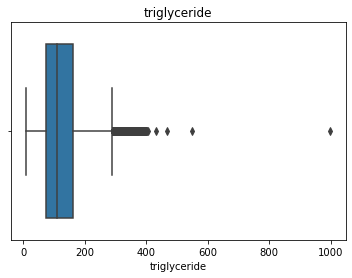

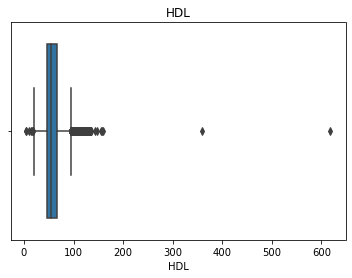

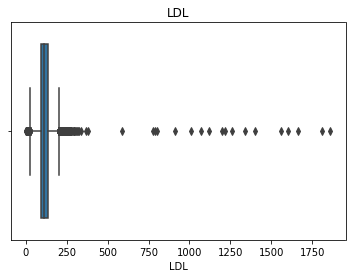

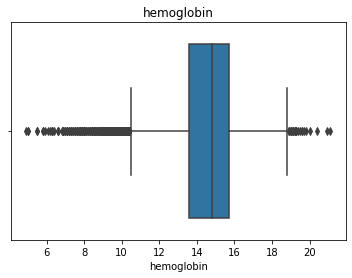

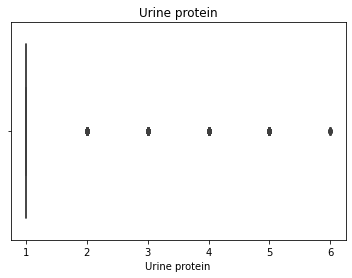

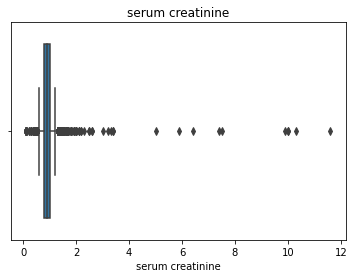

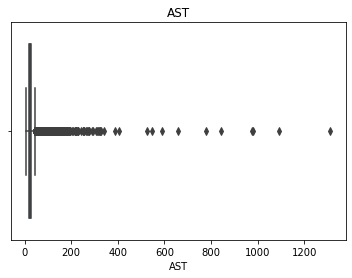

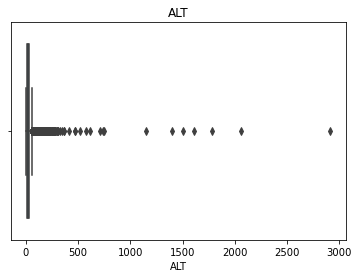

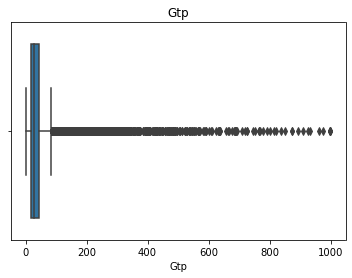

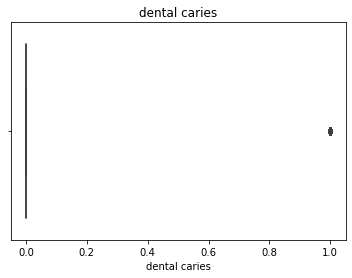

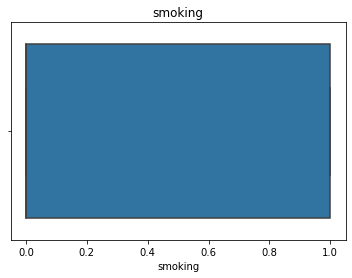

In [17]:
outliers(df)

In [18]:
# This Function is use to find lower and upper fence using IQR method
def IQR_method(x):
    Q1=x.quantile(q=.25)
    Q3=x.quantile(q=.75)
    IQR=Q3-Q1
    LF = Q1-(1.5*IQR)
    UF= Q3+(1.5*IQR)
    print("lower_fence",LF)
    print("upper_fence",UF)

In [19]:
df.select_dtypes([int,float]).columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [20]:
df["Gtp"] = np.where(df["Gtp"]>84.5,84.5,df["Gtp"])

In [21]:
df["age"] = np.where(df["age"]>77.5,77,df["age"])
df["height(cm)"] = np.where(df["height(cm)"]<145,145,df["height(cm)"])
df["height(cm)"] = np.where(df["height(cm)"]>185,185,df["height(cm)"])
df["weight(kg)"] = np.where(df["weight(kg)"]>105,105,df["weight(kg)"])

In [22]:
df["eyesight(left)"] = np.where(df["eyesight(left)"]>1.7999999999999998,1.7999999999999998,df["eyesight(left)"])
df["eyesight(left)"] = np.where(df["eyesight(left)"]<.20000000000000018,.20000000000000018,df["eyesight(left)"])
df["eyesight(right)"] = np.where(df["eyesight(right)"]>1.7999999999999998,1.7999999999999998,df["eyesight(right)"])
df["eyesight(right)"] = np.where(df["eyesight(right)"]<.20000000000000018,.20000000000000018,df["eyesight(right)"])
df["systolic"] = np.where(df["systolic"]>157,157,df["systolic"])
df["systolic"] = np.where(df["systolic"]<85,85,df["systolic"])

In [23]:
df["relaxation"] = np.where(df["relaxation"]>100,100,df["relaxation"])
df["relaxation"] = np.where(df["relaxation"]<52,52,df["relaxation"])
df["fasting blood sugar"] = np.where(df["fasting blood sugar"]>126,126,df["fasting blood sugar"])
df["fasting blood sugar"] = np.where(df["fasting blood sugar"]<66.5,66.5,df["fasting blood sugar"])
df["Cholesterol"] = np.where(df["Cholesterol"]<100,100,df["Cholesterol"])
df["Cholesterol"] = np.where(df["Cholesterol"]>292,292,df["Cholesterol"])

In [24]:
df["triglyceride"] = np.where(df["triglyceride"]>289,289,df["triglyceride"])
df["HDL"] = np.where(df["HDL"]>94.5,94.5,df["HDL"])
df["HDL"] = np.where(df["HDL"]<18.5,18.5,df["HDL"])
df["LDL"] = np.where(df["LDL"]>202,202,df["LDL"])
df["LDL"] = np.where(df["LDL"]<26,26,df["LDL"])

In [25]:
df["hemoglobin"] = np.where(df["hemoglobin"]>18.849,18.849,df["hemoglobin"])
df["hemoglobin"] = np.where(df["hemoglobin"]<10.45,10.45,df["hemoglobin"])
df["waist(cm)"] = np.where(df["waist(cm)"]>106,106,df["waist(cm)"])
df["waist(cm)"] = np.where(df["waist(cm)"]<58,58,df["waist(cm)"])
df["serum creatinine"] = np.where(df["serum creatinine"]>1.2,1.2,df["serum creatinine"])
df["serum creatinine"] = np.where(df["serum creatinine"]<0.60,0.600,df["serum creatinine"])
df["AST"] = np.where(df["AST"]>44,44,df["AST"])

In [26]:
df["ALT"] = np.where(df["ALT"]>55,55,df["ALT"])
df["AST"] = np.where(df["AST"]>44,44,df["AST"])
df["Gtp"] = np.where(df["Gtp"]>84.5,84.5,df["Gtp"])

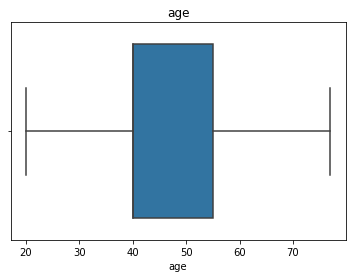

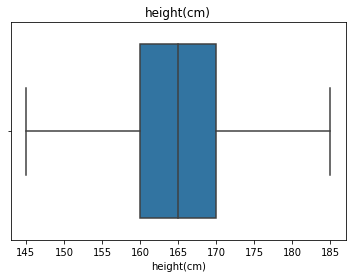

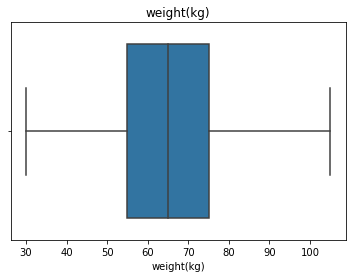

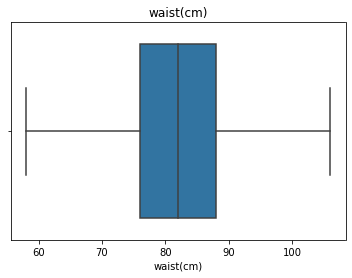

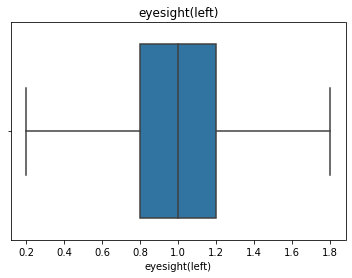

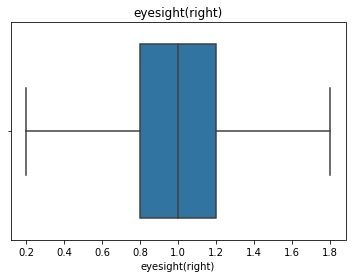

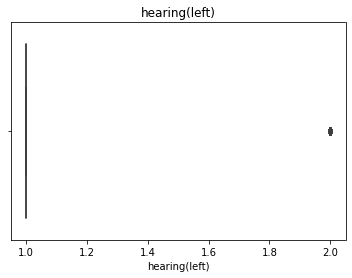

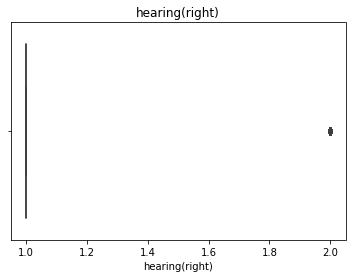

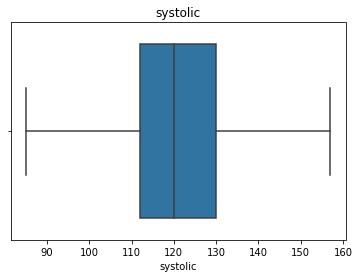

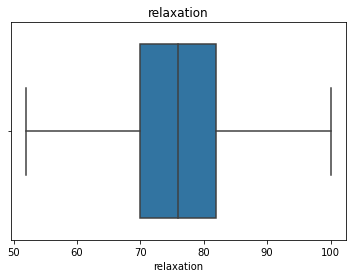

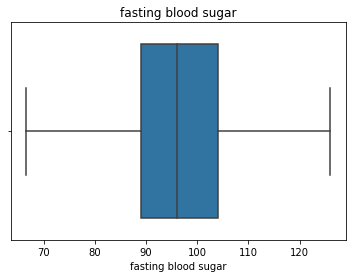

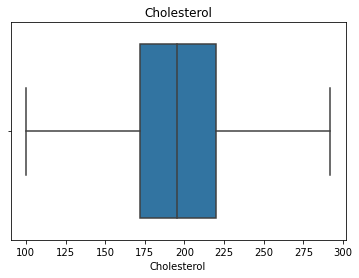

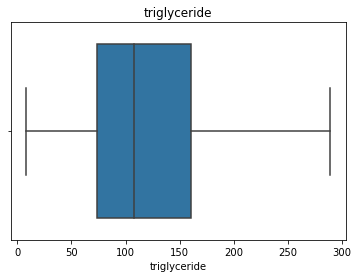

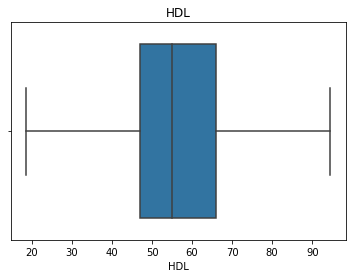

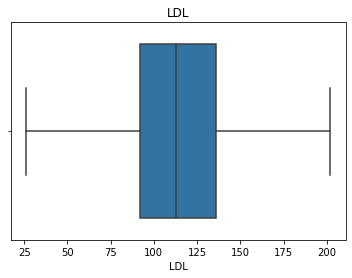

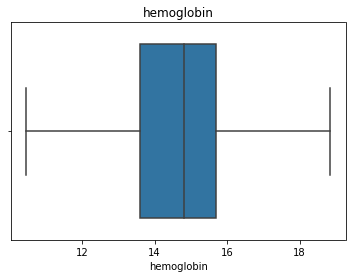

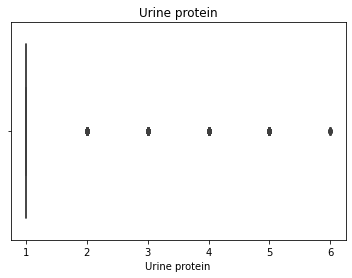

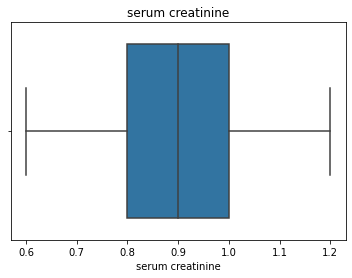

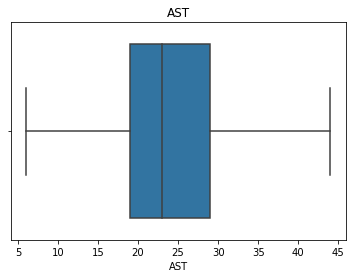

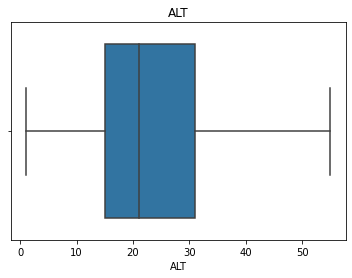

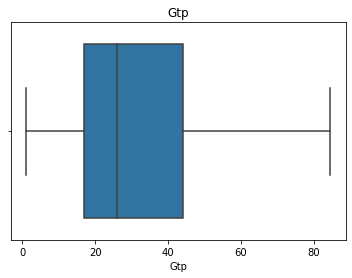

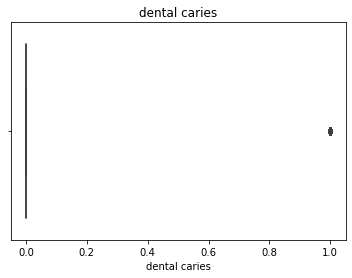

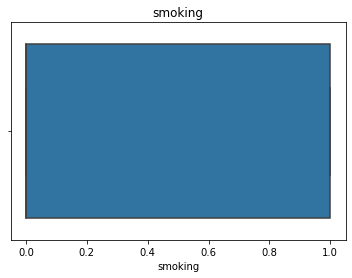

In [27]:
outliers(df)

In [28]:
df.corr()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.479464,-0.325857,-0.025549,-0.330410,-0.327433,0.203730,0.207020,0.131857,0.051043,...,0.008902,0.049376,-0.276058,0.026644,-0.149210,0.088864,-0.098311,-0.013423,-0.116172,-0.161011
height(cm),-0.479464,1.000000,0.678710,0.381808,0.238273,0.243219,-0.079480,-0.076743,0.086447,0.118190,...,-0.221132,-0.057897,0.550367,0.007329,0.461658,0.075988,0.242905,0.241186,0.080716,0.394413
weight(kg),-0.325857,0.678710,1.000000,0.821115,0.169348,0.170008,-0.051719,-0.052538,0.270001,0.272959,...,-0.369746,0.050973,0.502379,0.031568,0.389520,0.217900,0.445924,0.375736,0.074852,0.300931
waist(cm),-0.025549,0.381808,0.821115,1.000000,0.036521,0.037914,0.023314,0.019843,0.319702,0.292175,...,-0.387045,0.084715,0.390852,0.042772,0.273864,0.263052,0.447052,0.406000,0.044448,0.225832
eyesight(left),-0.330410,0.238273,0.169348,0.036521,1.000000,0.689305,-0.091640,-0.097787,-0.037787,0.005061,...,-0.023613,-0.007467,0.146141,-0.022455,0.100475,-0.021005,0.058863,0.034434,0.017123,0.089865
eyesight(right),-0.327433,0.243219,0.170008,0.037914,0.689305,1.000000,-0.093920,-0.100096,-0.034495,0.006999,...,-0.025503,-0.006413,0.148343,-0.023729,0.099244,-0.017908,0.062549,0.037513,0.024907,0.098154
hearing(left),0.203730,-0.079480,-0.051719,0.023314,-0.091640,-0.093920,1.000000,0.506171,0.057308,0.009949,...,-0.021246,-0.019591,-0.029842,0.013231,0.000204,0.026416,-0.019132,0.002645,-0.013395,-0.023519
hearing(right),0.207020,-0.076743,-0.052538,0.019843,-0.097787,-0.100096,0.506171,1.000000,0.052250,0.004122,...,-0.021536,-0.017593,-0.032562,0.015334,0.007188,0.028695,-0.020484,0.006181,-0.016059,-0.018060
systolic,0.131857,0.086447,0.270001,0.319702,-0.037787,-0.034495,0.057308,0.052250,1.000000,0.756188,...,-0.092873,0.016873,0.189881,0.042435,0.078152,0.167614,0.189115,0.238272,0.028175,0.075077
relaxation,0.051043,0.118190,0.272959,0.292175,0.005061,0.006999,0.009949,0.004122,0.756188,1.000000,...,-0.094224,0.051493,0.238005,0.043526,0.097573,0.163303,0.202499,0.259657,0.029822,0.108519


In [29]:
df["gender"] = np.where(df["gender"]=="M",1,0)
df["tartar"] = np.where(df["tartar"]=="Y",1,0)
df.drop(columns="oral",inplace=True)

In [32]:
y = df["smoking"]
X = df.drop(columns="smoking")

In [33]:
X_train = pd.read_csv("x_train.csv")
X_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [78]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=88)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [35]:
log = LogisticRegression()

In [36]:
log = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GaussianNB()
knn = KNeighborsClassifier()
svm1 = SVC()

# Data Transfromation

In [37]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()

In [84]:
sc_Xtrain = sc.fit(X_train)
sc_Xtest = sc.fit(X_test)

In [85]:
X_train1 = sc_Xtrain.transform(X_train)
X_test1 = sc_Xtest.transform(X_test)

In [72]:
x_train1 = pd.DataFrame(X_train1,columns=X_train.columns)

In [86]:
x_test1 = pd.DataFrame(X_test1,columns=X_test.columns)

# LogisticRegression

In [93]:
X_train.drop(columns="ID",inplace=True)
X_test.drop(columns="ID",inplace=True)

In [42]:
X_train["gender"] = np.where(X_train["gender"]=="M",1,0)
X_train["tartar"] = np.where(X_train["tartar"]=="Y",1,0)
X_train.drop(columns="oral",inplace=True)

In [ ]:
X_train["gender"] = np.where(X_train["gender"]=="M",1,0)
X_train["tartar"] = np.where(X_train["tartar"]=="Y",1,0)
X_train.drop(columns="oral",inplace=True)

In [44]:
X_test["gender"] = np.where(X_test["gender"]=="M",1,0)
X_test["tartar"] = np.where(X_test["tartar"]=="Y",1,0)
X_test.drop(columns="oral",inplace=True)

In [48]:
y_train.drop(columns="ID",inplace=True)
y_test.drop(columns="ID",inplace=True)

In [94]:
log.fit(X_train,y_train)

LogisticRegression()

In [95]:
print("Train accuracy", log.score(X_train,y_train))
print("Test accuracy", log.score(X_test,y_test))

Train accuracy 0.7161133930375059
Test accuracy 0.7183768740461441


In [96]:
print(metrics.classification_report(y_train,log.predict(X_train)))
print("************************************************************")
print(metrics.classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79     28201
           1       0.63      0.53      0.58     16352

    accuracy                           0.72     44553
   macro avg       0.69      0.68      0.68     44553
weighted avg       0.71      0.72      0.71     44553

************************************************************
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      7036
           1       0.64      0.55      0.59      4103

    accuracy                           0.72     11139
   macro avg       0.70      0.68      0.69     11139
weighted avg       0.71      0.72      0.71     11139



## DecisionTreeClassifier

In [97]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=23, min_samples_leaf=2)

In [98]:
print("Train accuracy", dt.score(X_train,y_train))
print("Test accuracy", dt.score(X_test,y_test))

Train accuracy 0.9521019908872579
Test accuracy 0.9533171738935272


In [55]:
max_dep = [2,4,6,8,10,12,14,16,18,20]
min_Sa = [100,110,120,130,140,150,160]
for i in max_dep:
    for j in min_Sa:
        dt = DecisionTreeClassifier(criterion="gini",
                                   max_depth= i,
                                   min_samples_leaf=6,
                                   min_samples_split=j,
                                   random_state=88)
        dt.fit(X_train,y_train)
        print("max_depth {} and min-sample {} ".format(i,j))
        print("Train accuracy", dt.score(X_train,y_train))
        print("Test accuracy", dt.score(X_test,y_test))
        print("********************************************")

max_depth 2 and min-sample 100 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
********************************************
max_depth 2 and min-sample 110 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
********************************************
max_depth 2 and min-sample 120 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
********************************************
max_depth 2 and min-sample 130 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
********************************************
max_depth 2 and min-sample 140 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
********************************************
max_depth 2 and min-sample 150 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
********************************************
max_depth 2 and min-sample 160 
Train accuracy 0.7259219356721208
Test accuracy 0.7263668192835981
*************************************

max_depth 18 and min-sample 110 
Train accuracy 0.7934370300540928
Test accuracy 0.7887602118682108
********************************************
max_depth 18 and min-sample 120 
Train accuracy 0.7909905056898525
Test accuracy 0.7877726905467277
********************************************
max_depth 18 and min-sample 130 
Train accuracy 0.7888582138127623
Test accuracy 0.7838226052607954
********************************************
max_depth 18 and min-sample 140 
Train accuracy 0.7870177092451687
Test accuracy 0.7822964359457761
********************************************
max_depth 18 and min-sample 150 
Train accuracy 0.7859403407177967
Test accuracy 0.7805009426339887
********************************************
max_depth 18 and min-sample 160 
Train accuracy 0.7843242879267389
Test accuracy 0.7802316186372206
********************************************
max_depth 20 and min-sample 100 
Train accuracy 0.7974547168540839
Test accuracy 0.7902863811832301
******************************

In [99]:
dt = DecisionTreeClassifier(max_depth=23,min_samples_leaf=2)
dt.fit(X_train,y_train)
print("Train accuracy", dt.score(X_train,y_train))
print("Test accuracy", dt.score(X_test,y_test))

Train accuracy 0.9527753462168653
Test accuracy 0.953496723224706


In [100]:
print(metrics.classification_report(y_train,dt.predict(X_train)))
print("**********************************************************")
print(metrics.classification_report(y_test,dt.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28201
           1       0.97      0.90      0.93     16352

    accuracy                           0.95     44553
   macro avg       0.96      0.94      0.95     44553
weighted avg       0.95      0.95      0.95     44553

**********************************************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7036
           1       0.97      0.90      0.93      4103

    accuracy                           0.95     11139
   macro avg       0.96      0.94      0.95     11139
weighted avg       0.95      0.95      0.95     11139



# RandomForestClassifier

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
print("Train Accuracy",rf.score(X_train,y_train))
print("Train Accuracy",rf.score(X_test,y_test))

Train Accuracy 1.0
Train Accuracy 1.0


# KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier()

In [105]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
# knn.fit(X_train1,y_train)

In [106]:
print("Train Accuracy",knn.score(X_train,y_train))
print("Train Accuracy",knn.score(X_test,y_test))

Train Accuracy 0.7921127645725315
Train Accuracy 0.7919920998294281


In [48]:
k = []
train = []
test = []
for i in range(3,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("KNeighborsClassifier" ,i)
    k.append(i)
    print("Train Accuracy",knn.score(X_train,y_train))
    train.append(round(knn.score(X_train,y_train),2))
    print("Train Accuracy",knn.score(X_test,y_test))
    test.append(round(knn.score(X_test,y_test),2))
    print("*********************************************")

KNeighborsClassifier 3
Train Accuracy 0.8294660643640751
Train Accuracy 0.6781506003815508
*********************************************
KNeighborsClassifier 5
Train Accuracy 0.7942818663898319
Train Accuracy 0.6881382560879812
*********************************************
KNeighborsClassifier 7
Train Accuracy 0.7793271793720715
Train Accuracy 0.6916171024576366
*********************************************
KNeighborsClassifier 9
Train Accuracy 0.7686933587722006
Train Accuracy 0.6933004152171474
*********************************************
KNeighborsClassifier 11
Train Accuracy 0.7611178137538228
Train Accuracy 0.699584782852654
*********************************************
KNeighborsClassifier 13
Train Accuracy 0.7567408321876491
Train Accuracy 0.6991358994501178
*********************************************
KNeighborsClassifier 15
Train Accuracy 0.7520271597317696
Train Accuracy 0.699697003703288
*********************************************
KNeighborsClassifier 17
Train Accuracy 0

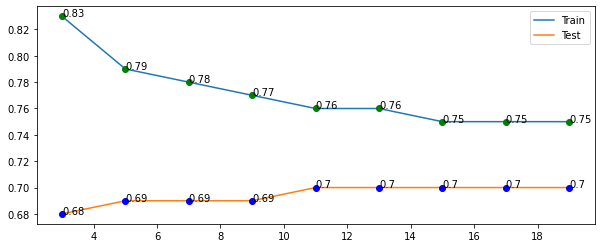

In [57]:
plt.figure(figsize=(10,4))
plt.plot(k,train,label = "Train")
plt.plot(k,train,"go")

plt.plot(k,test,label = "Test")
plt.plot(k,test,"bo")

for x,y in zip(k,train):
    plt.text(x,y,y)
    
for x,y in zip(k,test):
    plt.text(x,y,y)

plt.legend()
plt.show()

# Model Selection Results 💯👨‍🎓
- Decision Tree Classifier = 95 %
- Random Forest Classifier = 100 %

